In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import cv2
import os
from keras.preprocessing.image import img_to_array, array_to_img
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout,Flatten,Dense, Activation, BatchNormalization
from tensorflow.keras.optimizers import RMSprop, SGD

In [2]:
img = image.load_img(r"C:\Data\train\cats\cat.1.jpg")

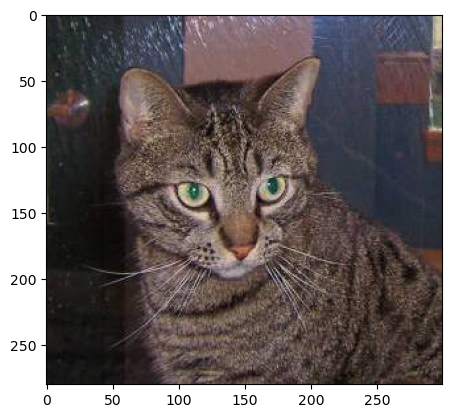

In [3]:
plt.imshow(img)

In [4]:
cv2.imread(r"C:\Data\train\cats\cat.1.jpg").shape

(280, 300, 3)

In [5]:
train = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)
test = ImageDataGenerator(rescale=1/255)


In [20]:
batch_size=32
train_samples = 8005 
validation_samples = 2023 

In [7]:
train_df = train.flow_from_directory(r"C:\Data\train",
                                     target_size=(64,64),batch_size=batch_size,class_mode='binary')
test_df = test.flow_from_directory(r"C:\Data\test",
                                     target_size=(64,64),batch_size=batch_size,class_mode='binary')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [8]:
train_df.class_indices

{'cats': 0, 'dogs': 1}

In [9]:
train_df.classes

array([0, 0, 0, ..., 1, 1, 1])

In [23]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(64,64,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(32,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1,activation='sigmoid'))

adam = tf.keras.optimizers.legacy.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 batch_normalization_12 (Ba  (None, 62, 62, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 29, 29, 32)        9248      
                                                                 
 batch_normalization_13 (Ba  (None, 29, 29, 32)        128       
 tchNormalization)                                               
                                                      

C:\Users\LENOVO\anaconda3\lib\site-packages\keras\src\optimizers\legacy\adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [13]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [14]:
earlystop=EarlyStopping(patience=10)

In [15]:
learning_rate_reduction = ReduceLROnPlateau(monitor='accuracy',patience=2,verbose=1,factor=0.5,min_lr=0.00001)

In [16]:
callbacks = [earlystop, learning_rate_reduction]

In [17]:
FAST_RUN = False

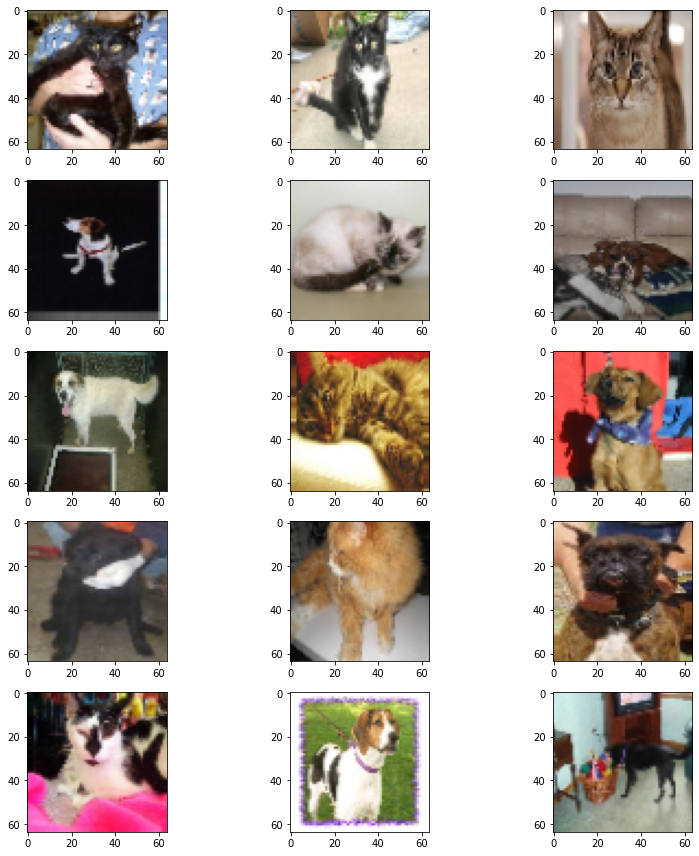

In [18]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in train_df:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [24]:

history = model.fit_generator(
    train_df,
    steps_per_epoch=train_samples // batch_size,
    epochs=20,
    validation_data=test_df,
    validation_steps=validation_samples // batch_size)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2832\4123866571.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/20
250/250 [==============================] - 137s 534ms/step - loss: 0.6428 - accuracy: 0.6711 - val_loss: 1.2445 - val_accuracy: 0.4995
Epoch 2/20
250/250 [==============================] - 132s 525ms/step - loss: 0.5220 - accuracy: 0.7389 - val_loss: 0.6451 - val_accuracy: 0.6672
Epoch 3/20
250/250 [==============================] - 132s 527ms/step - loss: 0.4898 - accuracy: 0.7584 - val_loss: 0.5145 - val_accuracy: 0.7569
Epoch 4/20
250/250 [==============================] - 132s 527ms/step - loss: 0.4518 - accuracy: 0.7910 - val_loss: 0.5860 - val_accuracy: 0.7212
Epoch 5/20
250/250 [==============================] - 133s 531ms/step - loss: 0.4410 - accuracy: 0.7927 - val_loss: 0.5487 - val_accuracy: 0.7297
Epoch 6/20
250/250 [==============================] - 131s 522ms/step - loss: 0.4183 - accuracy: 0.8075 - val_loss: 0.6371 - val_accuracy: 0.6979
Epoch 7/20
250/250 [==============================] - 130s 521ms/step - loss: 0.3851 - accuracy: 0.8253 - val_loss: 0.5364 -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


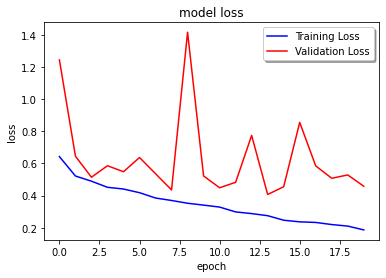

In [25]:
# list all data in history
print(history.history.keys())

plt.plot(history.history['loss'],color='b',label='Training Loss')
plt.plot(history.history['val_loss'],color='r',label='Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('model loss')
plt.legend(loc='best',shadow=True)



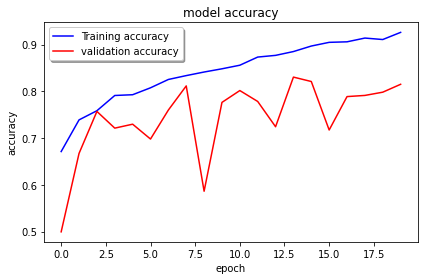

In [26]:
plt.plot(history.history['accuracy'],color='b',label='Training accuracy')
plt.plot(history.history['val_accuracy'],color='r',label='validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.title('model accuracy')
plt.legend(loc='best',shadow=True)

plt.tight_layout()

In [ ]:
test_df.class_indices

In [31]:
x1 = model.evaluate_generator(train_df)
x2 = model.evaluate_generator(test_df) 

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2832\382925178.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  x1 = model.evaluate_generator(train_df)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2832\382925178.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  x2 = model.evaluate_generator(test_df)


In [32]:
print('Training Accuracy  : %1.2f%%     Training loss  : %1.6f'%(x1[1]*100,x1[0]))
print('Validation Accuracy: %1.2f%%     Validation loss: %1.6f'%(x2[1]*100,x2[0]))

Training Accuracy  : 87.82%     Training loss  : 0.281068
Validation Accuracy: 81.51%     Validation loss: 0.457290
